# Boilerplate

In [1]:
import bayesian_multitarget_latent_factors as bmlf
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import xarray as xr

rng = np.random.default_rng(314159)

In [2]:
def plot_all_B_dict(B_dict, ax = None):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(13,8))
    else:
        fig = ax.get_figure()
    for i in range(B_dict['p']):
        bmlf.plot_col_basis_dict(B_dict, col_idx=i, ax=ax)
    ax.get_legend().set_visible(False)
    ax.set_title('')
    return fig, ax

# Prior and Dataset Generation

## Basis Matrix Build

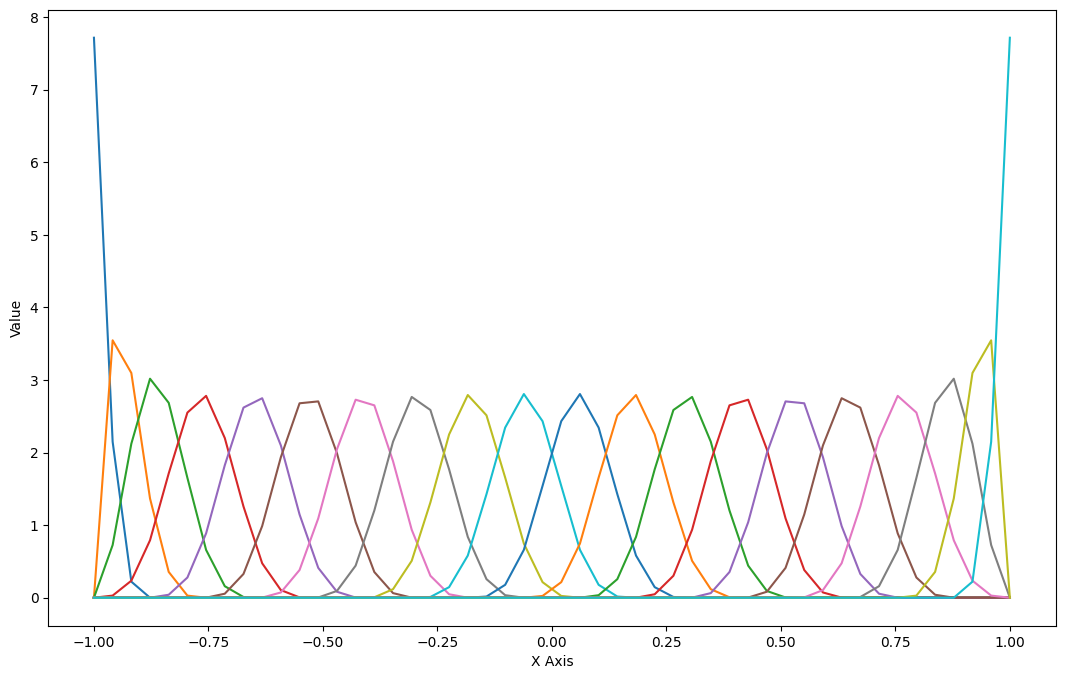

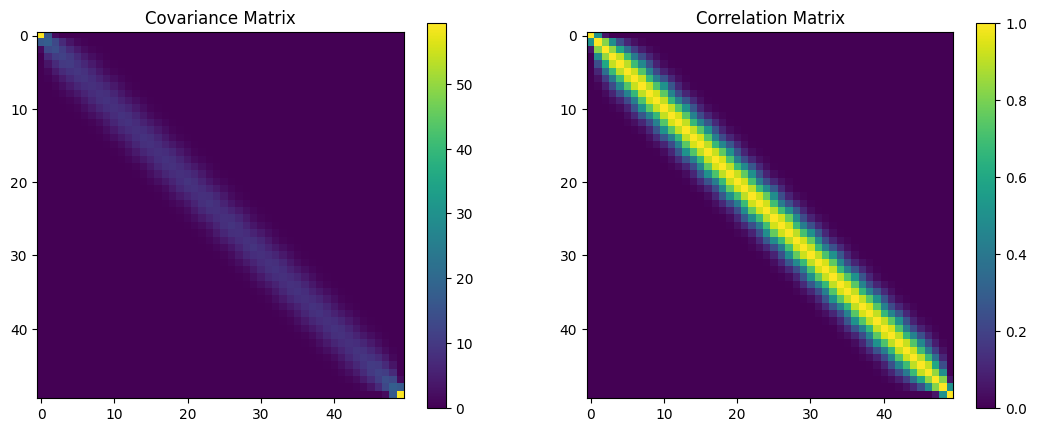

In [3]:
B1 = bmlf.make_basis_dict_structured(
    basis_type='bspline',
    dimensionality=1,
    p=4,
    n_basis=20,
    domain_range=(-1,1),
    grid_spacing=None,
    num_points=50,
    add_optional_terms='no',
)
plot_all_B_dict(B1)
fig, axs = plt.subplots(1,2, figsize=(13,5))
bmlf.dataset_generator_toolbox.show_hat_matrix(B1['B'], ax=axs[0])
bmlf.dataset_generator_toolbox.show_hat_matrix(B1['B'], ax=axs[1], corr=True)

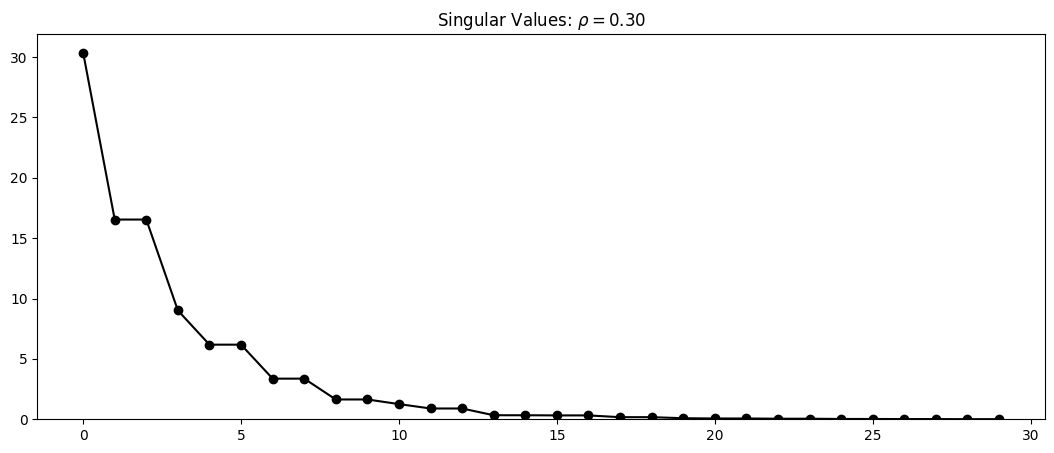

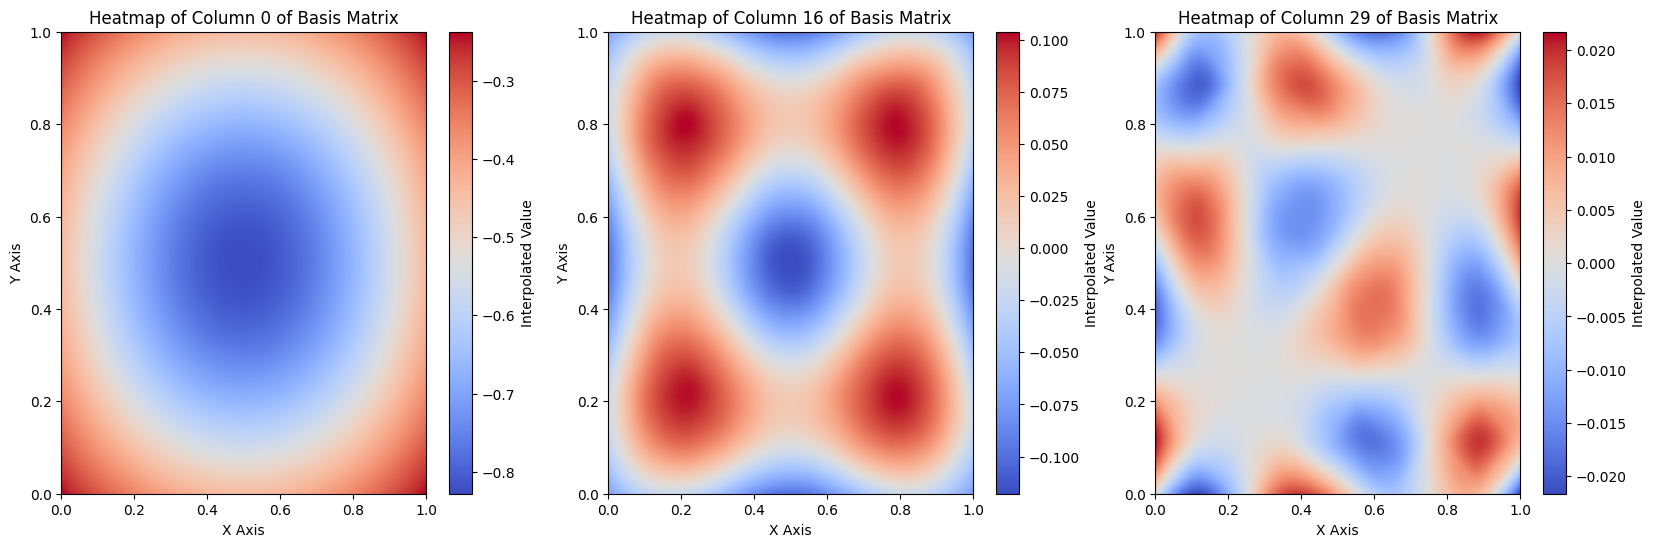

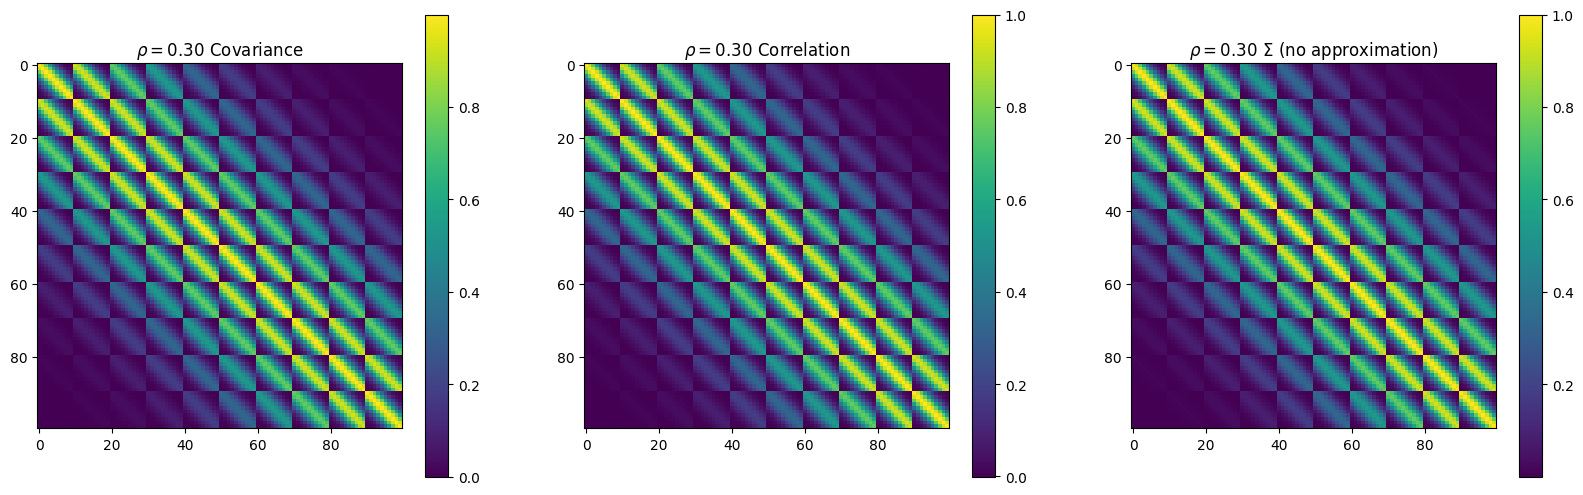

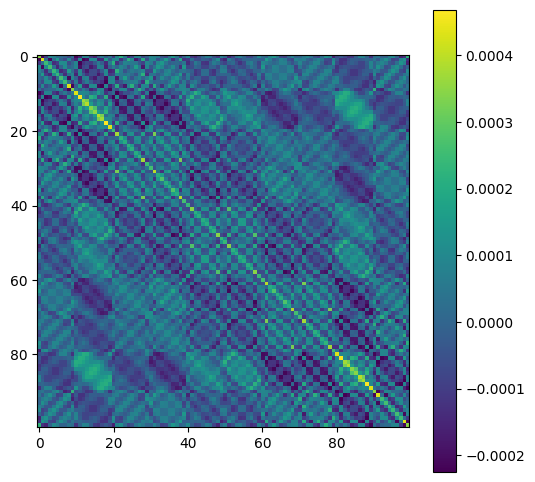

In [4]:
rho = 0.3
num_singular_values = 30
type_cov = 'exp_quad'

B = bmlf.make_basis_dict_structured(
    basis_type='bspline',
    dimensionality=2,
    p=3,
    n_basis=10,
    domain_range=(0, 1),
    num_points=10,
    add_optional_terms='bilinear',
)
x = B['t']

fig, ax= plt.subplots(1,1,figsize=(13,5))
B = bmlf.build_matrix_B_from_gaussian_process_covariance(
    x,
    rho,
    num_singular_values=num_singular_values,
    type_cov=type_cov,
    nugget=1e-8
)
U = bmlf.build_matrix_B_from_gaussian_process_covariance(
    x,
    rho,
    num_singular_values=num_singular_values,
    type_cov=type_cov,
    nugget=1e-8,
    use_S=False
)
S = np.square( np.diag(U['B'].T@B['B']) )
ax.plot(S, 'ko-')
ax.set_title('Singular Values: ' + r'$\rho = ' + f'{rho:.2f}' + '$')
ax.set_ylim(bottom=0.0)

B = bmlf.build_matrix_B_from_gaussian_process_covariance(
    x,
    0.3,
    num_singular_values=num_singular_values,
    type_cov=type_cov,
    nugget=1e-8
)
fig, axs = plt.subplots(1,3,figsize=(20,6))
bmlf.plot_col_basis_dict(B, col_idx=0, ax=axs[0])
bmlf.plot_col_basis_dict(B, col_idx=16, ax=axs[1])
bmlf.plot_col_basis_dict(B, col_idx=29, ax=axs[2])

fig, axs = plt.subplots(1,3,figsize=(20,6))
B = bmlf.build_matrix_B_from_gaussian_process_covariance(
    x,
    rho,
    num_singular_values=num_singular_values,
    type_cov=type_cov,
    nugget=1e-8
)
HatMatrix = B['B']@(B['B'].T)
bmlf.dataset_generator_toolbox.show_hat_matrix(B['B'], ax=axs[0])
bmlf.dataset_generator_toolbox.show_hat_matrix(B['B'], ax=axs[1], corr=True)
axs[0].set_title(r'$\rho = ' + f'{rho:.2f}' + '$ Covariance')
axs[1].set_title(r'$\rho = ' + f'{rho:.2f}' + '$ Correlation')
B = bmlf.build_matrix_B_from_gaussian_process_covariance(
    x,
    rho,
    num_singular_values=x.shape[0],
    type_cov=type_cov,
    nugget=1e-8
)
bmlf.dataset_generator_toolbox.show_hat_matrix(B['B'], ax=axs[2])
axs[2].set_title(r'$\rho = ' + f'{rho:.2f}' + '$ Σ (no approximation)')

fig, ax= plt.subplots(1,1,figsize=(6,6))
img = ax.imshow( B['B']@(B['B'].T) - HatMatrix , )
plt.colorbar(img, ax=ax)

In [5]:
B2 = bmlf.build_matrix_B_from_gaussian_process_covariance(
    x,
    rho,
    num_singular_values=num_singular_values,
    type_cov=type_cov,
    nugget=1e-8,
    sigma=np.sqrt(10)
)

# Hyperparameters and Data Generation

In [6]:
N_train = 100
N_test = 50

hyperparams_dict = \
bmlf.initialize_hyperparams_dict(
    k=4,
    v=4,
    nu=4,
    ψ_alpha=5,
    ψ_beta=4,
    ψ_sigma_1=1.0,
    ψ_sigma_2=1.0,
    θ_alpha=5,
    θ_beta=4,
    θ_sigma_1=1.0,
    θ_sigma_2=1.0,
    alpha_1=2.1,
    alpha_2=2.5,
)

generator_dict = bmlf.make_prior_dict(
    hyperparams_dict,
    B1,
    B2,
    N = N_train + N_test,
    r = 5
)

generator_dict['X'] = rng.normal(scale = 0.1, size=generator_dict['X'].shape)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

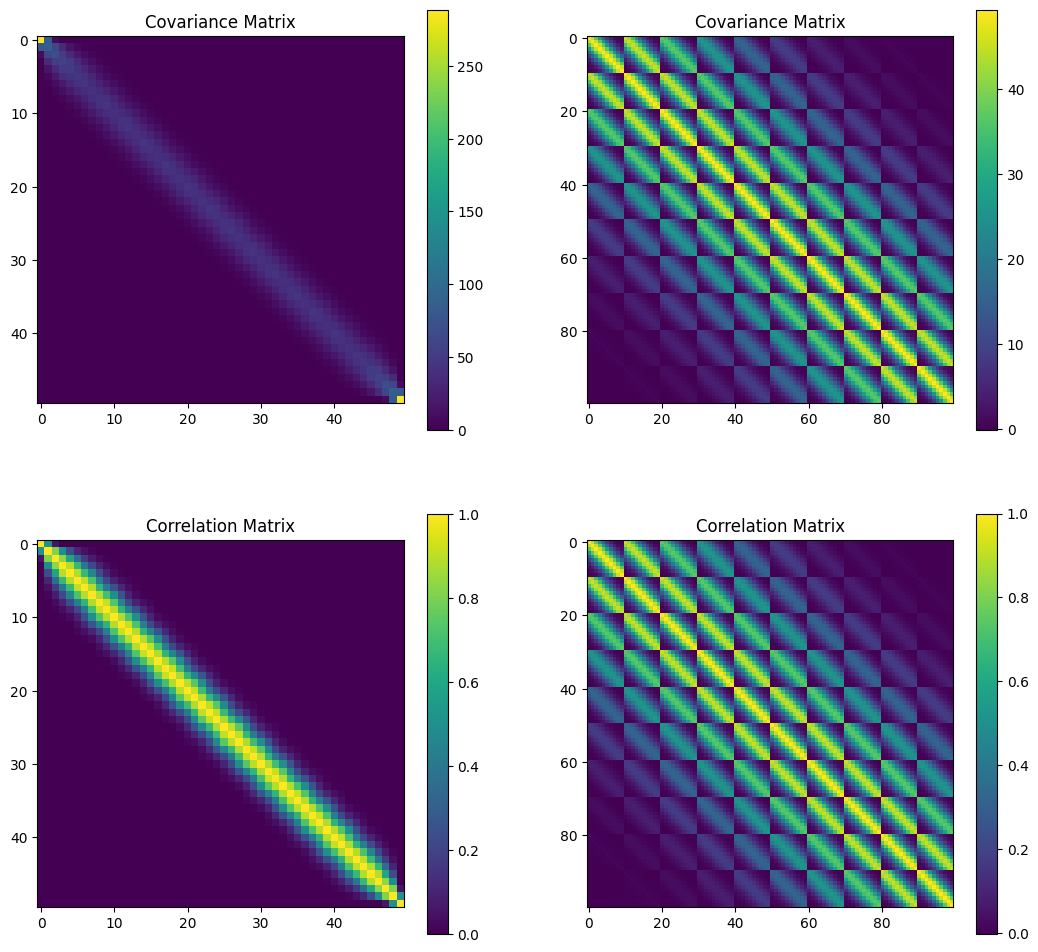

In [7]:
bmlf.prior_predictive_properties_from_prior_dict(generator_dict)

In [8]:
generator_sample_ds = \
bmlf.sample_from_prior(
    data_dic = generator_dict,
    X_test = np.zeros((generator_dict['r'],1)),
    n_samples = 5,
    rng_seed = rng.integers(1000000),
)

In [9]:
prior_dict = bmlf.make_prior_dict(
    hyperparams_dict,
    B1,
    B2,
    y1 = generator_sample_ds.sel(sample=0)['y1_predictive'].values[:,:N_train],
    y2 = generator_sample_ds.sel(sample=0)['y2_predictive'].values[:,:N_train],
    X = generator_dict['X'][:,:N_train]
)

In [10]:
test_set_dic = {
    'y1' : generator_sample_ds.sel(sample=0)['y1_predictive'].values[:,N_train:],
    'y2' : generator_sample_ds.sel(sample=0)['y2_predictive'].values[:,N_train:],
    'X' : generator_dict['X'][:,N_train:]
}

# Posterior Sampling

In [11]:
out_dir = './SIS2024_posterior'

In [12]:
from os.path import isfile

if not isfile(out_dir + '/idata.nc'):
    idata = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir,
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
    )
    idata.to_netcdf(out_dir + '/idata.nc')

    prior_dict['k'] = 2
    idata2 = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir+'/2',
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
    )
    idata2.to_netcdf(out_dir + '/2/idata2.nc')
    
    prior_dict['k'] = 3
    idata3 = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir+'/3',
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
    )
    idata3.to_netcdf(out_dir + '/3/idata3.nc')
    
    prior_dict['k'] = 5
    idata5 = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir+'/5',
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
    )
    idata5.to_netcdf(out_dir + '/5/idata5.nc')
    
    prior_dict['k'] = 6
    idata6 = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir+'/6',
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
    )
    idata6.to_netcdf(out_dir + '/6/idata6.nc')
    
else:
    idata = az.from_netcdf(out_dir + '/idata.nc')
    idata2 = az.from_netcdf(out_dir + '/2/idata2.nc')
    idata3 = az.from_netcdf(out_dir + '/3/idata3.nc')
    idata5 = az.from_netcdf(out_dir + '/5/idata5.nc')
    idata6 = az.from_netcdf(out_dir + '/6/idata6.nc')
    

# Exploration of Posterior Distribution

## Compare PSIS-LOO

In [13]:
az_compare_res = \
az.compare(
    {
        '2 LF': idata2,
        '3 LF': idata3,
        '4 LF': idata,
        '5 LF': idata5,
        '6 LF': idata6,            
    },
    ic = 'loo'
)

/home/br1/PythonProjects/github/repo_bayesian_multitarget_latent_factors/examples/venv/lib/python3.10/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/br1/PythonProjects/github/repo_bayesian_multitarget_latent_factors/examples/venv/lib/python3.10/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-rob

In [14]:
az_compare_res

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
4 LF,0,-28621.245187,221.210334,0.000000,9.604061e-01,68.370124,0.000000,True,log
5 LF,1,-28630.685482,272.049498,9.440295,7.778380e-11,68.575456,2.959847,True,log
6 LF,2,-28636.213937,298.438072,14.968750,7.659999e-11,68.499682,3.669317,True,log
3 LF,3,-28891.403426,192.465491,270.158239,3.959392e-02,94.417081,54.419424,True,log
2 LF,4,-29346.916367,168.242103,725.671180,0.000000e+00,100.857790,68.827028,True,log


## Compute $\widehat{K}$

In [15]:
loo_res = az.loo(idata)

/home/br1/PythonProjects/github/repo_bayesian_multitarget_latent_factors/examples/venv/lib/python3.10/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


In [16]:
loo_res

Computed from 4000 posterior samples and 100 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -28621.25    68.37
p_loo      221.21        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       67   67.0%
 (0.5, 0.7]   (ok)         20   20.0%
   (0.7, 1]   (bad)        11   11.0%
   (1, Inf)   (very bad)    2    2.0%

In [17]:
dict_loo_res = dict(loo_res)

In [18]:
def transform_array(arr, thresholds):
    """
    Transform a numpy array of floats to a numpy array of ints based on the given thresholds.

    Parameters:
    - arr: numpy array of floats.
    - thresholds: list of thresholds defining the ranges for transformation.

    Returns:
    - A numpy array of ints where each element is transformed based on the thresholds.
    """
    # Create an output array filled with zeros, initially assuming all values fall into the first category.
    out = np.zeros(arr.shape, dtype=int)
    
    # Iterate over the thresholds, assigning an increasing integer value
    # for each range defined by these thresholds.
    for i, threshold in enumerate(thresholds):
        out[arr > threshold] = i + 1

    return out

In [19]:
thresholds = [0.5, 0.7, 1.0]
class_pareto_k = transform_array( dict_loo_res['pareto_k'].values , thresholds )

## Varimax

### Varimax-RSP

In [20]:
Varimax_res_xr = bmlf.Varimax_RSP(idata)
Varimax_res_xr6 = bmlf.Varimax_RSP(idata6)

Rotated sample 0
Rotated sample 500
Rotated sample 1000
Rotated sample 1500
Rotated sample 2000
Rotated sample 2500
Rotated sample 3000
Rotated sample 3500
Starting iteration number 0
	 Previous objective fun =	inf
	 New objective fun =		264786.285
Starting iteration number 1
	 Previous objective fun =	264786.285
	 New objective fun =		33235.289
Starting iteration number 2
	 Previous objective fun =	33235.289
	 New objective fun =		33199.891
Starting iteration number 3
Rotated sample 0
Rotated sample 500
Rotated sample 1000
Rotated sample 1500
Rotated sample 2000
Rotated sample 2500
Rotated sample 3000
Rotated sample 3500
Starting iteration number 0
	 Previous objective fun =	inf
	 New objective fun =		302674.263
Starting iteration number 1
	 Previous objective fun =	302674.263
	 New objective fun =		75842.107
Starting iteration number 2
	 Previous objective fun =	75842.107
	 New objective fun =		48503.856
Starting iteration number 3
	 Previous objective fun =	48503.856
	 New objective

### Project the test set and the training set samples on the Varimaxed Latent Space

In [21]:
# Use everything when projecting the test set (partial information is also allowed, but X must be always provided)
η_xr = \
bmlf.sample_projection_on_varimaxed_space(123, idata, Varimax_res_xr, X_test=test_set_dic['X'], Y1_test=test_set_dic['y1'], Y2_test=test_set_dic['y2'])

In [22]:
# Extract the η's sampled during the Posterior Distribution Sampling
η_train_xr = \
bmlf.sample_projection_on_varimaxed_space(123, idata, Varimax_res_xr)

Text(0, 0.5, '$\\eta_3$')

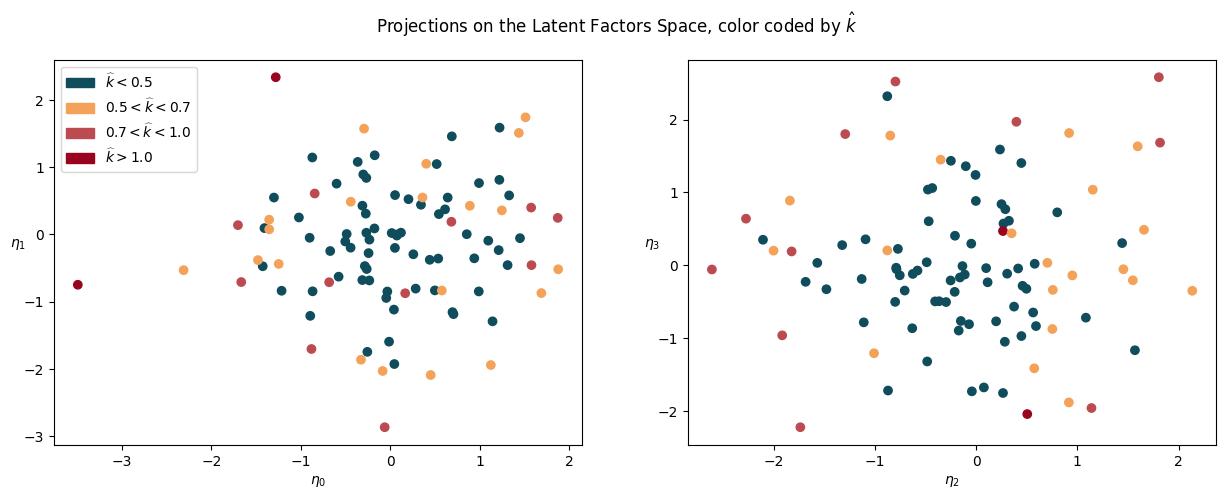

In [23]:
import matplotlib.patches as mpatches
fig, axs = plt.subplots(1,2,figsize=(15,5))

col_seq = ['Midnight green', 'Sandy brown', 'Bittersweet shimmer', 'Carmine']
class_labels = ['Good', 'Ok', 'Bad', 'Very Bad']
class_labels = [r'$\widehat{k} < 0.5$', r'$0.5 < \widehat{k} < 0.7$', r'$0.7 < \widehat{k} < 1.0$', r'$\widehat{k} > 1.0$']

axs[0].scatter(η_train_xr.mean('chain').mean('draw').values.T[:,0],
               η_train_xr.mean('chain').mean('draw').values.T[:,1], c=[bmlf.default_color_dict[col_seq[i]] for i in class_pareto_k])
axs[1].scatter(η_train_xr.mean('chain').mean('draw').values.T[:,2],
               η_train_xr.mean('chain').mean('draw').values.T[:,3], c=[bmlf.default_color_dict[col_seq[i]] for i in class_pareto_k])

legend_patches = [mpatches.Patch(color=bmlf.default_color_dict[col_seq[i]], label=class_labels[i]) for i in range(len(col_seq))]
axs[0].legend(handles=legend_patches, loc='upper left')

fig.suptitle(r'Projections on the Latent Factors Space, color coded by $\hat{k}$')
axs[0].set_xlabel(r'$\eta_0$')
axs[0].set_ylabel(r'$\eta_1$', rotation=0)
axs[1].set_xlabel(r'$\eta_2$')
axs[1].set_ylabel(r'$\eta_3$', rotation=0)

### Varimax the "True" Latent Factors, aligning the result on the results of Varimax-RSP by appropriate Signed Permutations

In [24]:
rot_Lambda1, rot_Lambda2, rotB1Λ1, rotB2Λ2 = \
bmlf.Varimax_true_lambdas(
    generator_sample_ds.sel(sample=0)['Lambda1'].values.copy(),
    generator_sample_ds.sel(sample=0)['Lambda2'].values.copy(),
    Varimax_res_xr,
    idata
)

## Estimation of Root Mean Square Error for the two targets depending on presented information

In [25]:
test_set_dic['y2'].std()

5.4734685703177774

In [26]:
np.sqrt(
    np.square(
        bmlf.sample_unconditional_predictive(idata, test_set_dic['X'], 123, bootstrap=1000)['Y2'].mean(dim='sample').values - test_set_dic['y2']
    ).mean()
)

5.472103665587318

In [27]:
np.sqrt(
    np.square(
        bmlf.sample_conditional_predictive(idata, test_set_dic['X'], 123, Y1_test=test_set_dic['y1'], bootstrap=1000,).mean(dim='sample').values - test_set_dic['y2']
    ).mean()
)

3.727899493361419

In [28]:
test_set_dic['y1'].std()

5.932282758519451

In [29]:
np.sqrt(
    np.square(
        bmlf.sample_unconditional_predictive(idata, test_set_dic['X'], 123, bootstrap=1000)['Y1'].mean(dim='sample').values - test_set_dic['y1']
    ).mean()
)

5.903024296981502

In [30]:
np.sqrt(
    np.square(
        bmlf.sample_conditional_predictive(idata, test_set_dic['X'], 123, Y2_test=test_set_dic['y2'], bootstrap=1000,).mean(dim='sample').values - test_set_dic['y1']
    ).mean()
)

3.921515987935337

## Compare the Latent Factors of $\boldsymbol{Y}^{(1)}$ with its "true" Latent Factors

#### Showing the product $\boldsymbol{B}\boldsymbol{\Lambda}$ as $\boldsymbol{\Lambda}$ is hard to interpret

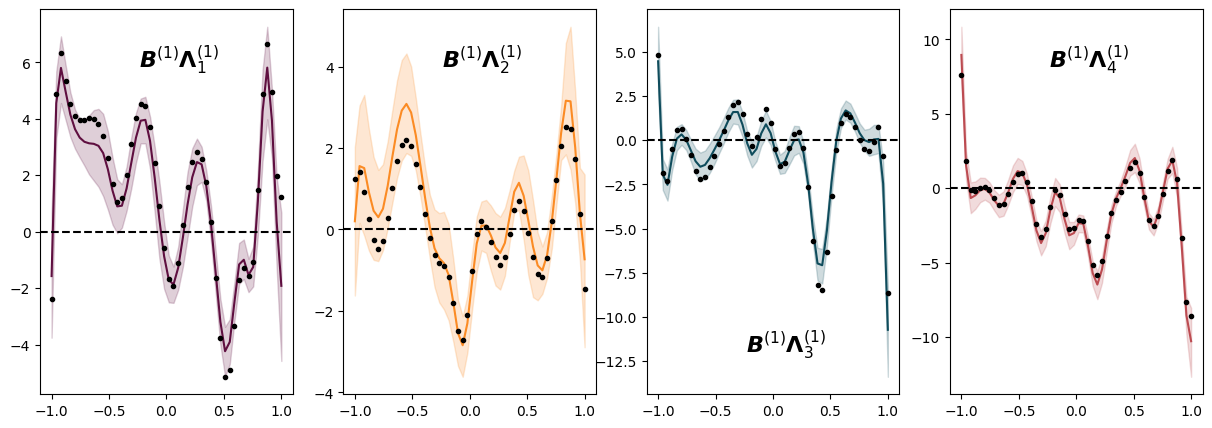

In [31]:
fig, axs = plt.subplots(1,4, figsize=(15,5))

subplot_labels = [
    [r'$\boldsymbol{B}^{(1)}\boldsymbol{\Lambda}_{1}^{(1)}$', r'$\boldsymbol{B}^{(1)}\boldsymbol{\Lambda}_{2}^{(1)}$', r'$\boldsymbol{B}^{(1)}\boldsymbol{\Lambda}_{3}^{(1)}$', r'$\boldsymbol{B}^{(1)}\boldsymbol{\Lambda}_{4}^{(1)}$'],
]

halignments = np.array(
    [
        ['center']*4
    ]
)
valignments = np.array(
    [
        ['center']*4
    ]
)

xlocs = np.array(
    [
        [0.55]*4,
    ]
)
ylocs = np.array(
    [
        [0.87]*2 + [0.13] + [0.87],
    ]
)

for i in range(4):
    color = bmlf.default_color_dict[list(bmlf.default_color_dict)[2*i]]
    if i == 3:
        color = bmlf.default_color_dict[list(bmlf.default_color_dict)[2*i+3]]
    
    bmlf.uncertain_lineplot(idata.constant_data['t1'].values,
                            bmlf.convert_chain_draw_to_sample(
                                Varimax_res_xr['B1Λ1']
                            ).sel(latent_factor_idx = i).values.T,
                            ax=axs[i],
                            color=color
                           )
    axs[i].axhline(0.0, linestyle='--', c='k')
    axs[i].plot(idata.constant_data['t1'], rotB1Λ1[:,i], 'k.')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    
    axs[i].text(xlocs[0,i], ylocs[0,i], subplot_labels[0][i], 
                horizontalalignment=halignments[0,i], verticalalignment=valignments[0,i], 
                transform=axs[i].transAxes, fontsize=16)


#### Looking directly at the Latent Factors is hard to interpret

X is within range 79 times out of 80. Which means 98.75% of the time.


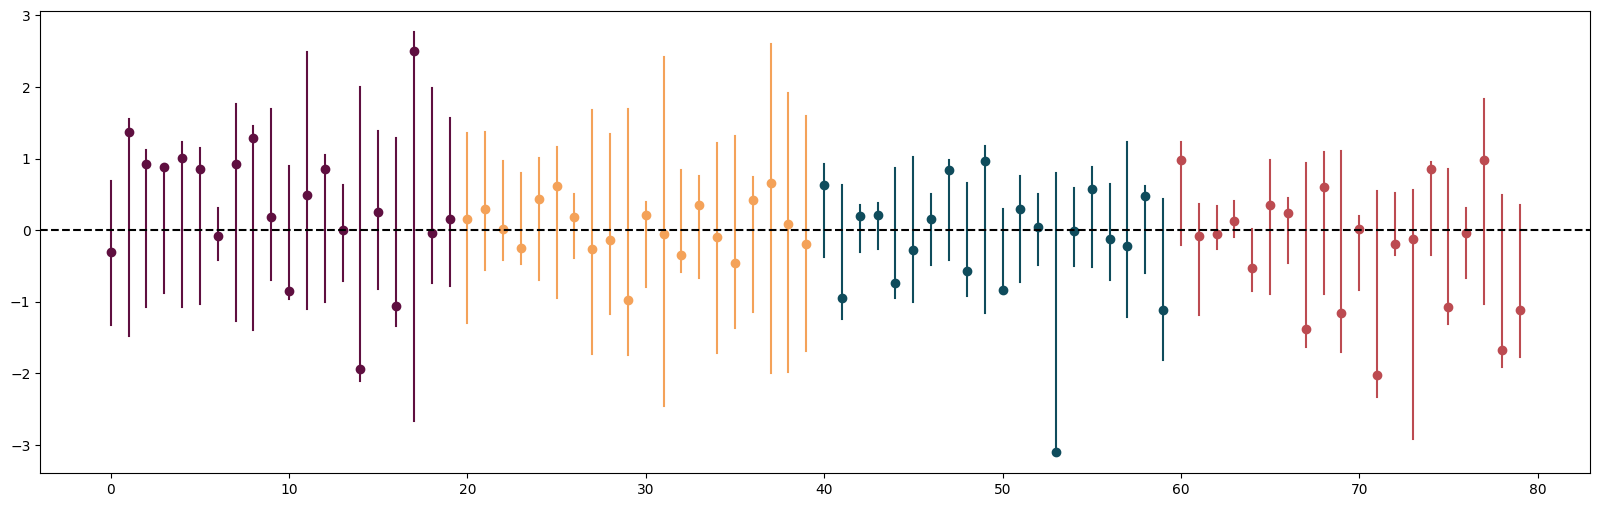

In [32]:
fig, ax = plt.subplots(1,1,figsize=(20,6))
bmlf.plot_with_credibility_intervals(
    rot_Lambda1,
    bmlf.convert_chain_draw_to_sample( idata.posterior['Lambda1'] ).transpose('sample','Lambda1_dim_0','Lambda1_dim_1').values,
    ax
)

#### The 2 additional latent factors are non-significant

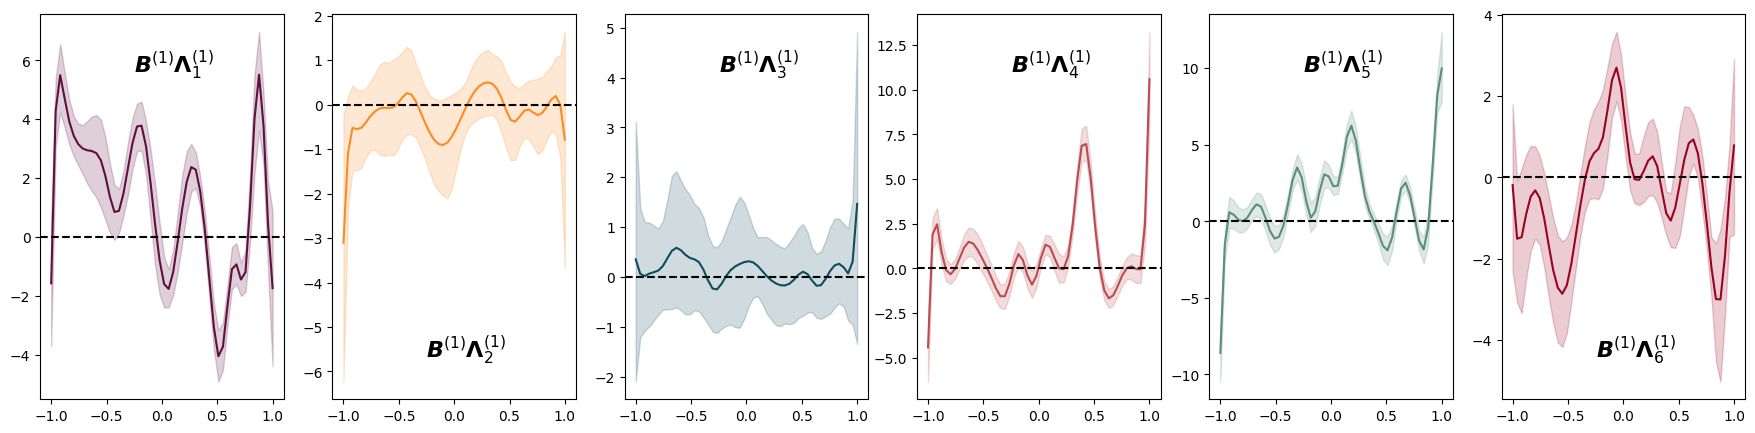

In [36]:
fig, axs = plt.subplots(1,6, figsize=(22,5))

subplot_labels = [
    [r'$\boldsymbol{B}^{(1)}\boldsymbol{\Lambda}_{'+str(i+1)+r'}^{(1)}$' for i in range(6)],
]

halignments = np.array(
    [
        ['center']*6
    ]
)
valignments = np.array(
    [
        ['center']*6
    ]
)

xlocs = np.array(
    [
        [0.55]*6,
    ]
)
ylocs = np.array(
    [
        [0.87] + [0.13] + [0.87]*3 + [0.13]
    ]
)

for i in range(6):
    color = bmlf.default_color_dict[list(bmlf.default_color_dict)[2*i%10]]
    if i == 3:
        color = bmlf.default_color_dict[list(bmlf.default_color_dict)[2*i+3]]
    if i == 5:
        color = bmlf.default_color_dict[list(bmlf.default_color_dict)[2*i%10 + 1]]        
    
    bmlf.uncertain_lineplot(idata.constant_data['t1'].values,
                            bmlf.convert_chain_draw_to_sample(
                                Varimax_res_xr6['B1Λ1']
                            ).sel(latent_factor_idx = i).values.T,
                            ax=axs[i],
                            color=color
                           )
    axs[i].axhline(0.0, linestyle='--', c='k')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    
    axs[i].text(xlocs[0,i], ylocs[0,i], subplot_labels[0][i], 
                horizontalalignment=halignments[0,i], verticalalignment=valignments[0,i], 
                transform=axs[i].transAxes, fontsize=16)


## Compare the Latent Factors of $\boldsymbol{Y}^{(2)}$ with its "true" Latent Factors

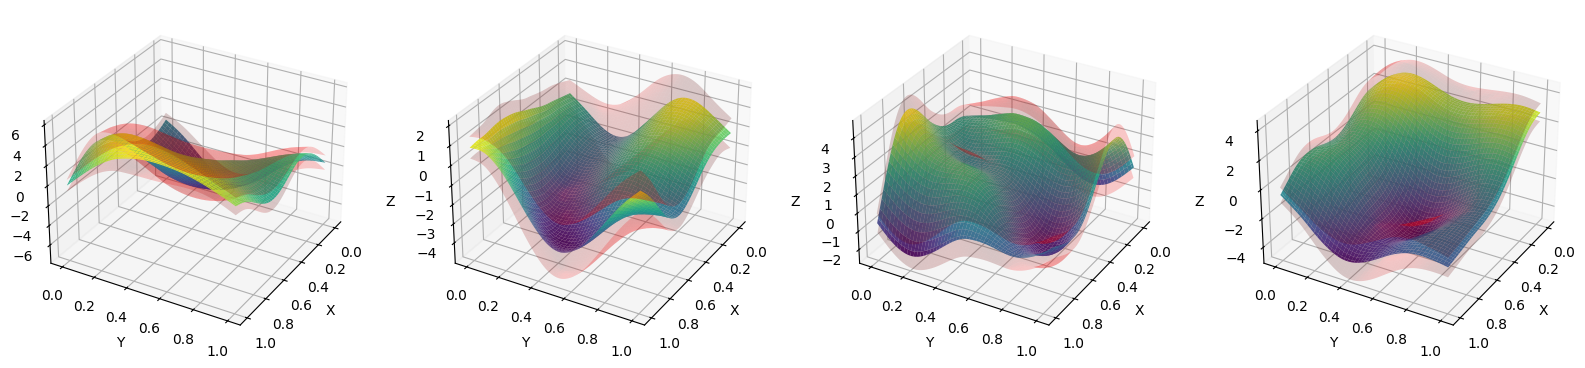

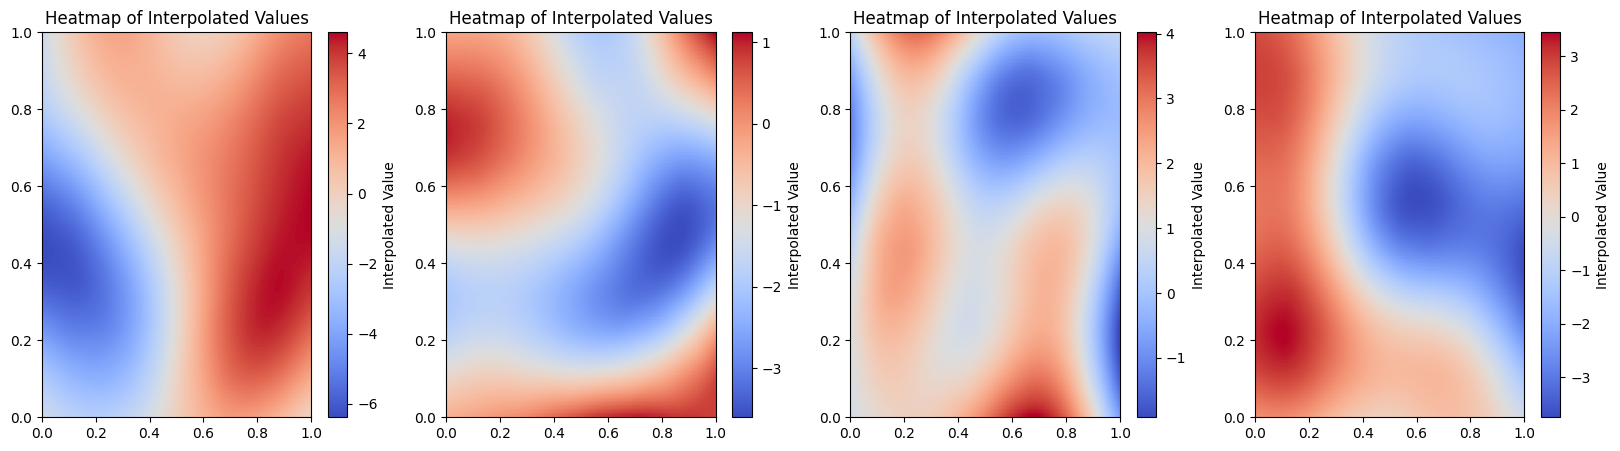

In [37]:
fig, axs = plt.subplots(1,4, figsize=(20,6))
for i in range(4):
    bmlf.plot_3d_with_computed_percentiles(
        idata.constant_data['t2'],
        bmlf.convert_chain_draw_to_sample( Varimax_res_xr['B2Λ2'] ).sel(latent_factor_idx = i).values,
        ax=axs[i]
    )

fig, axs = plt.subplots(1,4, figsize=(20,5))
for i in range(4):
    bmlf.plot_unstructured_heatmap(
        Varimax_res_xr['B2Λ2'].mean('chain').mean('draw').sel(latent_factor_idx=i).values,
        idata.constant_data['t2'].values,
        ax=axs[i],
        colormap='coolwarm'
    )

X is within range 117 times out of 120. Which means 97.5% of the time.


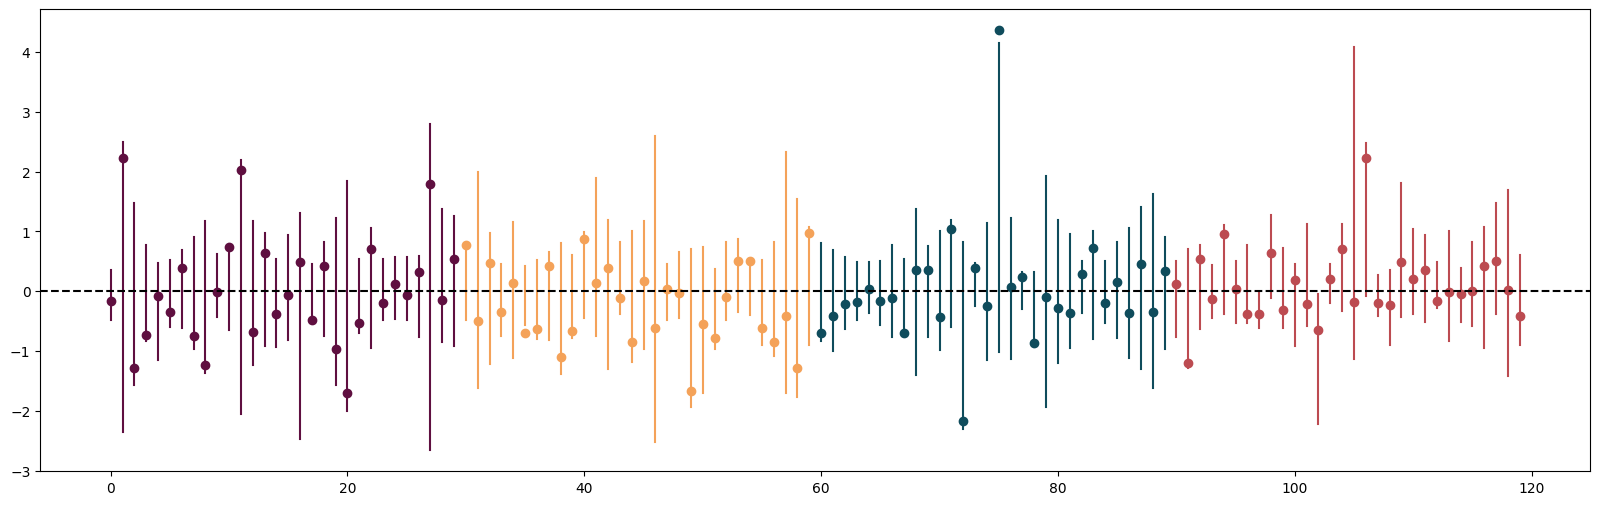

In [38]:
fig, ax = plt.subplots(1,1,figsize=(20,6))
bmlf.plot_with_credibility_intervals(
    rot_Lambda2,
    bmlf.convert_chain_draw_to_sample( idata.posterior['Lambda2'] ).transpose('sample','Lambda2_dim_0','Lambda2_dim_1').values,
    ax
)